In [1]:
import numpy as np 
import pandas as pd  
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Now you can use functions and variables from the os module

from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-04-06 01:16:37.736506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/data/archive (1)/full_df.csv')

In [3]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [4]:
# left_no_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "atrophy")]["Left-Fundus"].sample(250,random_state=42).values
left_cataract = df.loc[(df.C ==1) & (df["Left-Diagnostic Keywords"] == "cataract")]["Left-Fundus"].values

# right_no_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "atrophy")]["Right-Fundus"].sample(250,random_state=42).values
right_cataract = df.loc[(df.C ==1) & (df["Right-Diagnostic Keywords"] == "cataract")]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '112_right.jpg', '188_right.jpg', '218_right.jpg',
       '354_right.jpg', '477_right.jpg', '553_right.jpg', '560_right.jpg',
       '726_right.jpg', '769_right.jpg', '949_right.jpg', '955_right.jpg',
       '970_right.jpg', '999_right.jpg', '1062_right.jpg'], dtype=object)

In [5]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 268
Number of images in right cataract: 250


In [6]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]


array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [7]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [8]:
print(len(normal),len(cataract))


500 518


In [9]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/data/archive (1)/preprocessed_images/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
        


In [10]:
dataset = create_dataset(cataract,1)


100%|██████████| 518/518 [00:04<00:00, 103.98it/s]


In [11]:
len(dataset)


518

In [12]:
dataset = create_dataset(normal,0)


100%|██████████| 500/500 [00:04<00:00, 115.27it/s]


In [13]:
len(dataset)


1018

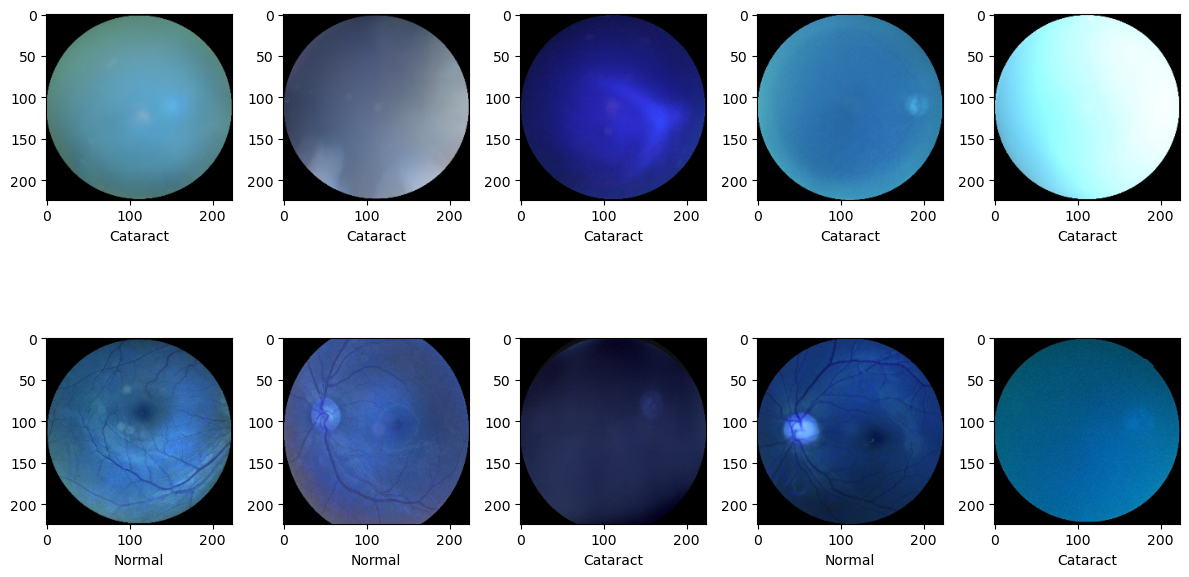

In [14]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

In [15]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [17]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))


In [18]:
for layer in vgg.layers:
    layer.trainable = False


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [21]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [23]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
26/26 [==============================] - 538s 21s/step - loss: 1.1151 - accuracy: 0.8993 - val_loss: 1.1959 - val_accuracy: 0.9314
Epoch 2/15
26/26 [==============================] - 3729s 149s/step - loss: 0.1865 - accuracy: 0.9816 - val_loss: 0.7358 - val_accuracy: 0.9510
Epoch 3/15
26/26 [==============================] - 1398s 54s/step - loss: 0.0409 - accuracy: 0.9914 - val_loss: 0.5663 - val_accuracy: 0.9608
Epoch 4/15
26/26 [==============================] - 1634s 64s/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 0.3637 - val_accuracy: 0.9608
Epoch 5/15
26/26 [==============================] - 10002s 397s/step - loss: 0.0046 - accuracy: 0.9975 - val_loss: 0.5282 - val_accuracy: 0.9608
Epoch 6/15
26/26 [==============================] - 4948s 197s/step - loss: 0.0247 - accuracy: 0.9988 - val_loss: 0.2891 - val_accuracy: 0.9755
Epoch 7/15
26/26 [==============================] - 3928s 118s/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.6051 - val_accuracy: 0.

In [24]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 37s 5s/step - loss: 0.6014 - accuracy: 0.9657
loss: 0.6013566851615906
Accuracy: 0.9656862616539001


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict_classes(x_test)


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [26]:
accuracy_score(y_test,y_pred)


NameError: name 'y_pred' is not defined

In [27]:
print(classification_report(y_test,y_pred))


NameError: name 'y_pred' is not defined

In [28]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);


ModuleNotFoundError: No module named 'mlxtend'

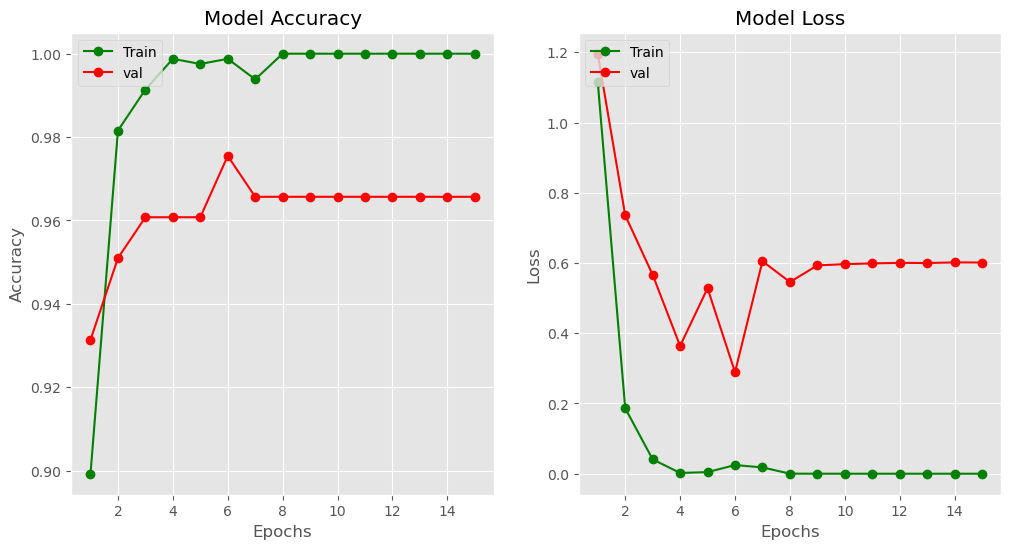

In [29]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()


In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

In [30]:
model.save('/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/models/catarc.h5')  # Replace '/path/to/save/model.h5' with your desired file path


/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
